Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Month

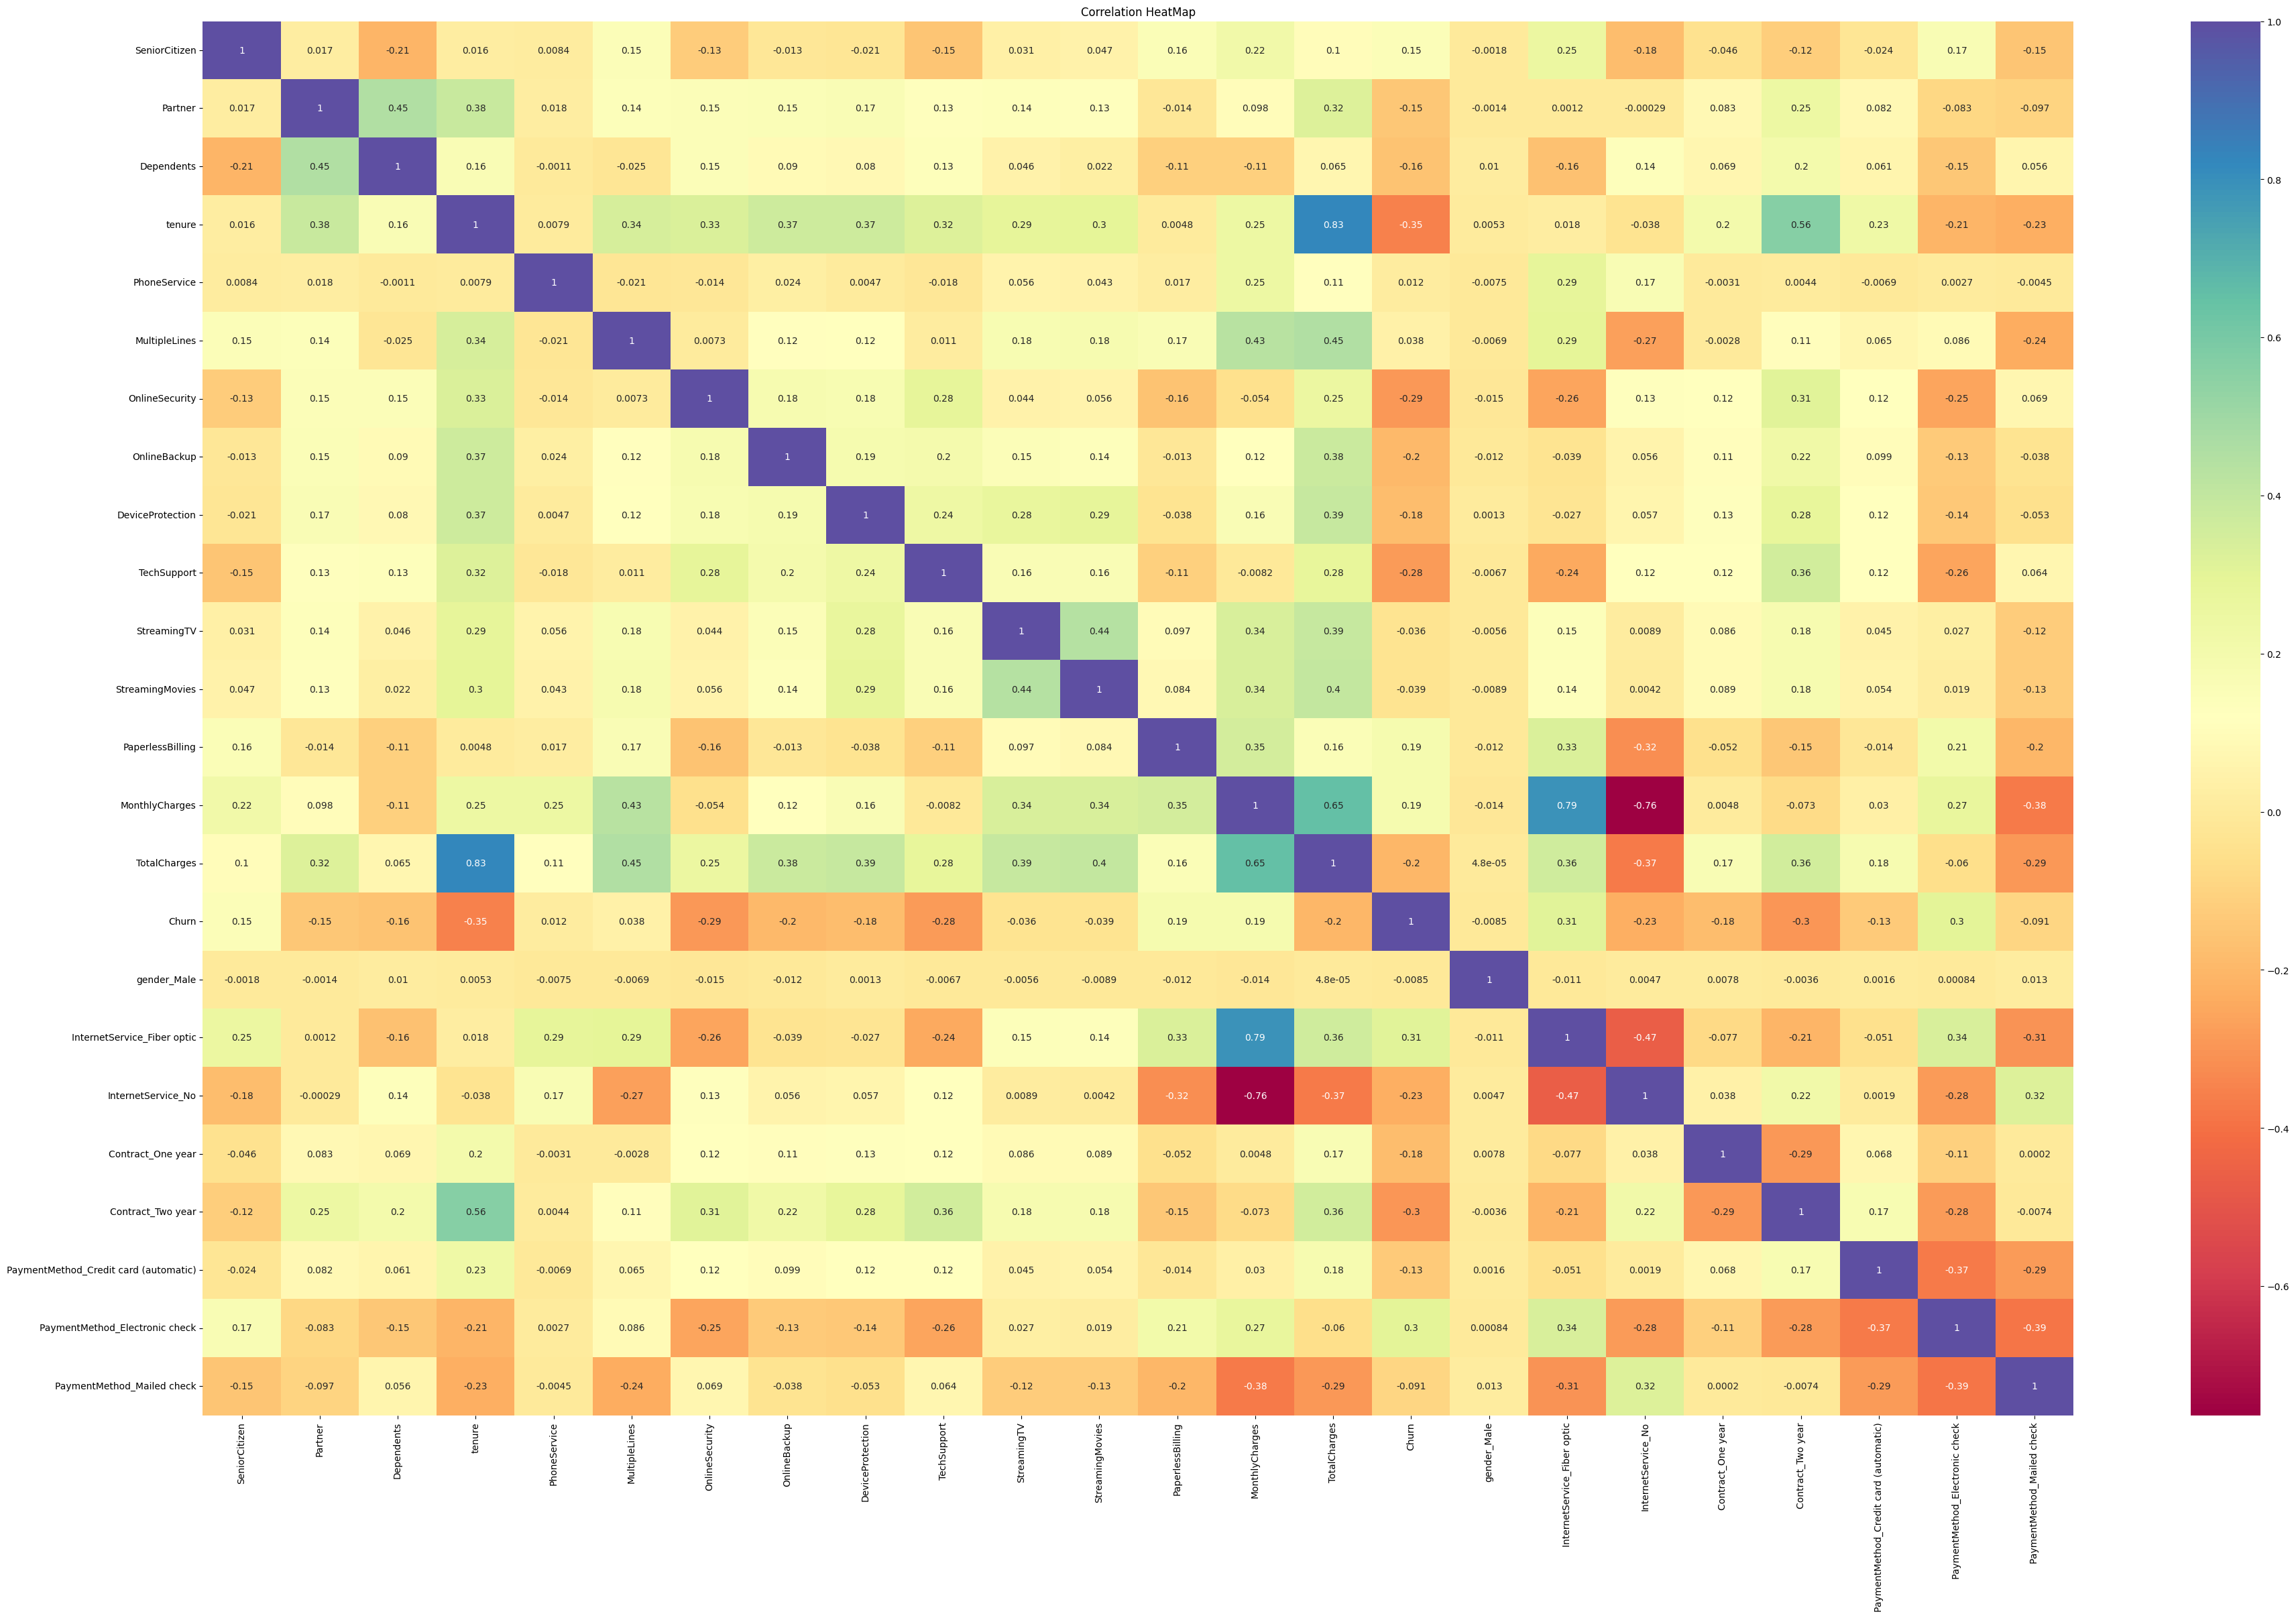

Second-largest correlation coefficient with 'Churn': 0.3540493589532519
Feature associated with the second-largest correlation coefficient: tenure


<Figure size 2400x1800 with 0 Axes>

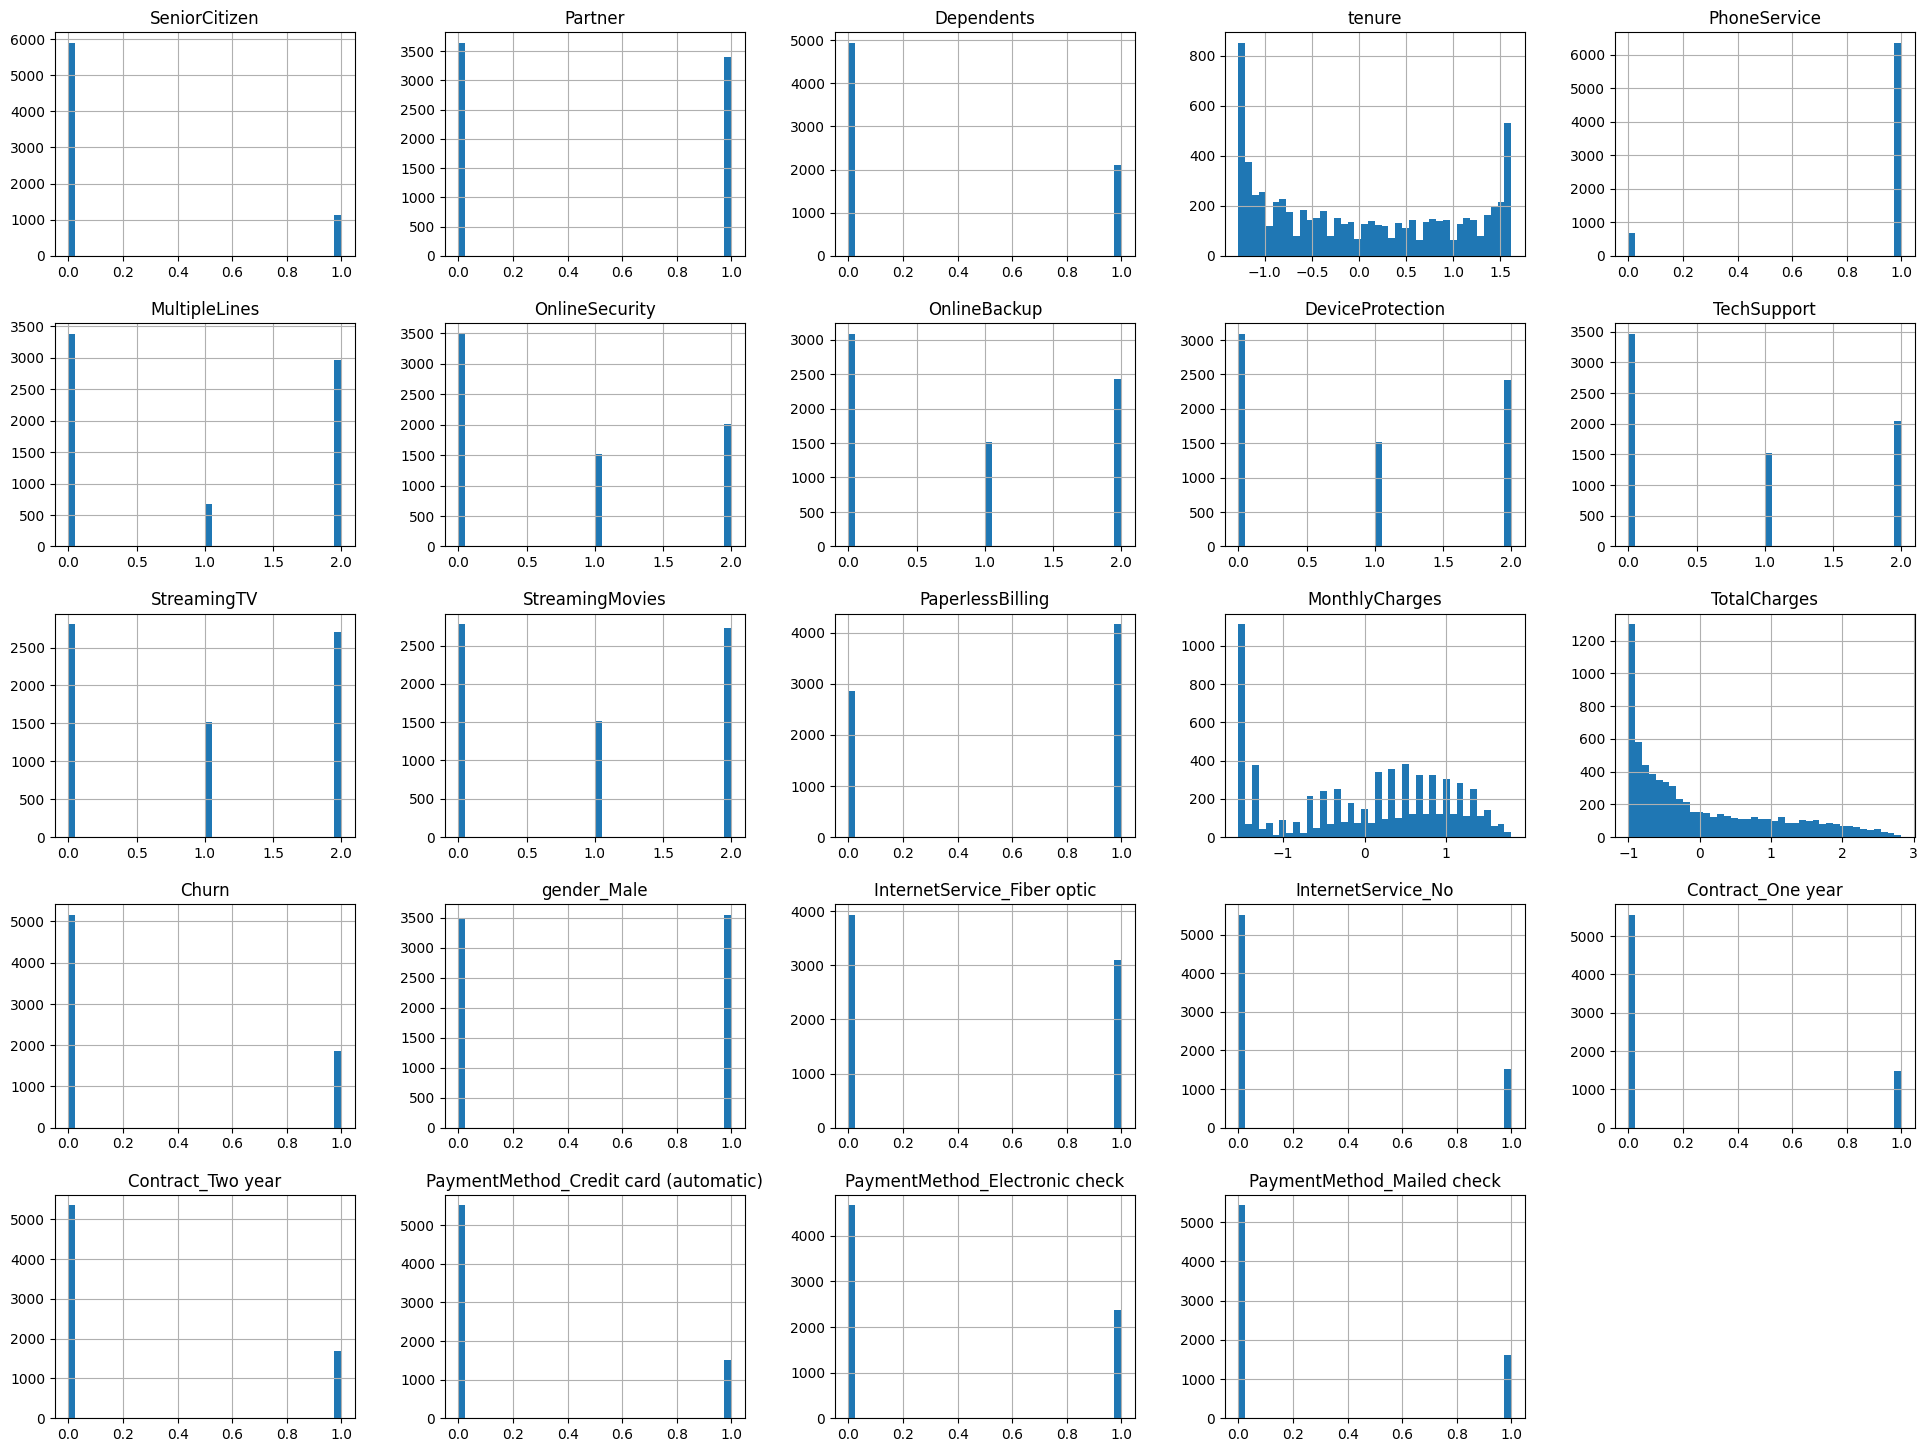

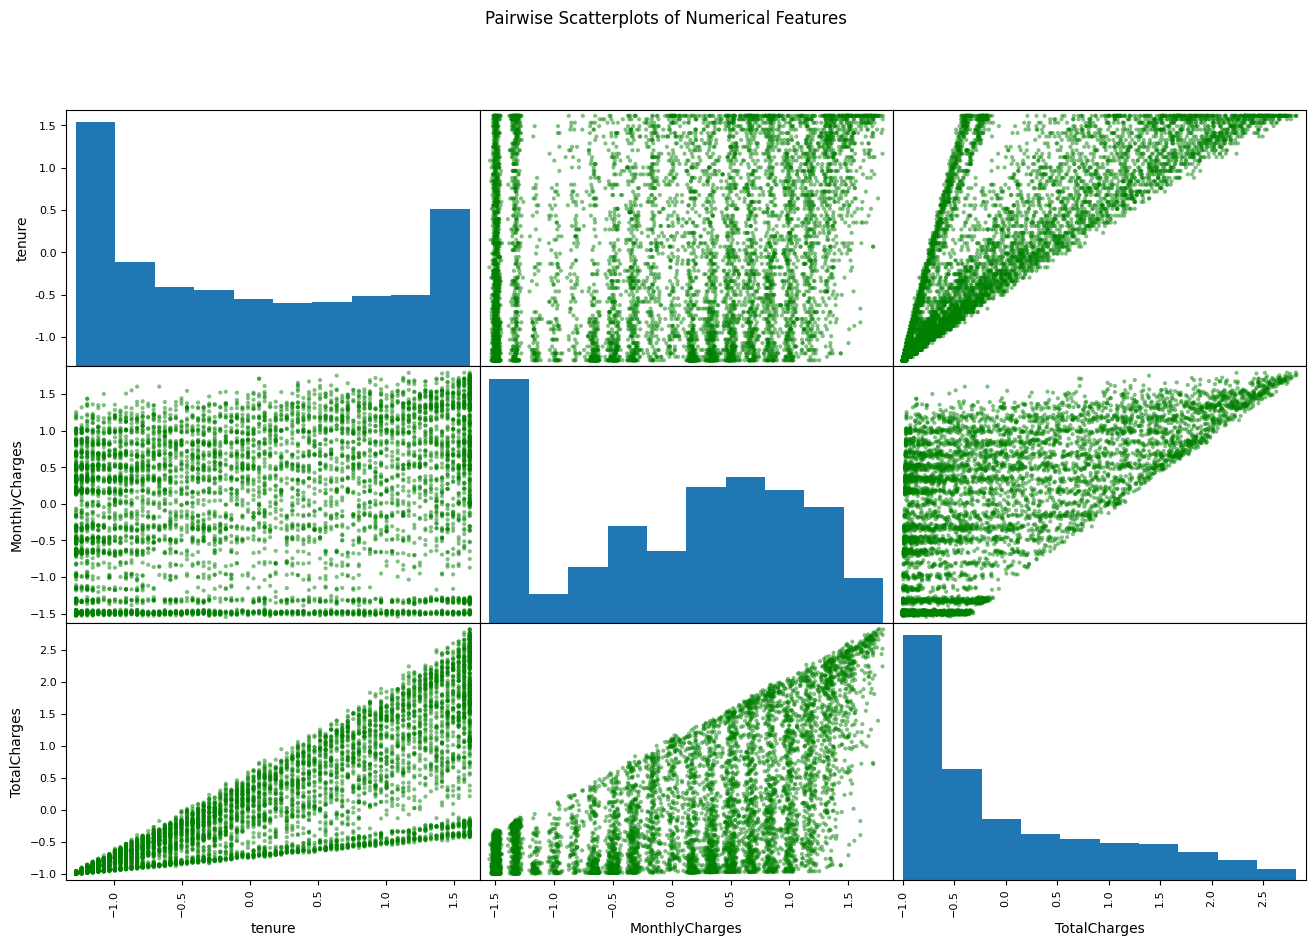

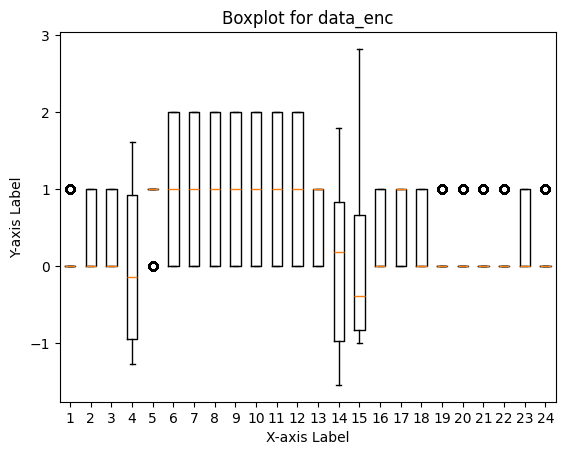

SeniorCitizen                              int64
Partner                                    int32
Dependents                                 int32
tenure                                   float64
PhoneService                               int32
MultipleLines                              int32
OnlineSecurity                             int32
OnlineBackup                               int32
DeviceProtection                           int32
TechSupport                                int32
StreamingTV                                int32
StreamingMovies                            int32
PaperlessBilling                           int32
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                              float64
InternetService_Fiber optic              float64
InternetService_No                       float64
Contract_One year                        float64
Contract_Two year                        float64
PaymentMethod_Credit

In [ ]:
import numpy as np
import pandas as pd
import sklearn
data = pd.read_csv(r"C:\Users\anshu\Downloads\archive (5)\WA_Fn-UseC_-Telco-Customer-Churn.csv")



data.head()

data.shape

print("Missing Values:")
print(data.isnull().sum())

print(data.dtypes)

data_rem = data.drop('customerID', axis=1)
data_rem.head()

#Normalizing ordinal categorical by label encoding

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label_enc = LabelEncoder()
data_rem['Partner'] = label_enc.fit_transform(data_rem['Partner'].astype(str))
data_rem['Dependents'] = label_enc.fit_transform(data_rem['Dependents'].astype(str))
data_rem['PhoneService'] = label_enc.fit_transform(data_rem['PhoneService'].astype(str))
data_rem['PaperlessBilling'] = label_enc.fit_transform(data_rem['PaperlessBilling'].astype(str))
data_rem['Churn'] = label_enc.fit_transform(data_rem['Churn'].astype(str))
data_rem['MultipleLines'] = label_enc.fit_transform(data_rem['MultipleLines'].astype(str))
data_rem['OnlineSecurity'] = label_enc.fit_transform(data_rem['OnlineSecurity'].astype(str))
data_rem['OnlineBackup'] = label_enc.fit_transform(data_rem['OnlineBackup'].astype(str))
data_rem['DeviceProtection'] = label_enc.fit_transform(data_rem['DeviceProtection'].astype(str))
data_rem['TechSupport'] = label_enc.fit_transform(data_rem['TechSupport'].astype(str))
data_rem['StreamingTV'] = label_enc.fit_transform(data_rem['StreamingTV'].astype(str))
data_rem['StreamingMovies'] = label_enc.fit_transform(data_rem['StreamingMovies'].astype(str))

data_rem

#Normalizing nominal data by one hot encoder
from sklearn.preprocessing import OneHotEncoder
nominal_cols = ['gender','InternetService','Contract','PaymentMethod']

enc = OneHotEncoder(drop='first', sparse_output=False)
enc_data = enc.fit_transform(data_rem[nominal_cols])
enc_columns = enc.get_feature_names_out(input_features=nominal_cols)
data_encode = pd.DataFrame(enc_data, columns=enc_columns)
data_encode

data_encode_fin = pd.concat([data_rem.drop(nominal_cols, axis=1), data_encode], axis=1)
data_enc=data_encode_fin.dropna()
data_enc.head()

#normalizing numerical data
numerical_cols=['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import StandardScaler
data_enc['TotalCharges'] = pd.to_numeric(data_enc['TotalCharges'], errors='coerce', downcast='float')
scaler=StandardScaler()
data_enc[numerical_cols]= scaler.fit_transform(data_enc[numerical_cols])

data_enc

data_enc = data_enc.dropna()

print("Missing Values:")
print(data_enc.isnull().sum())

"""#Exploratory data analysis (EDA)"""

# exploitary data analysis
import matplotlib.pyplot as plt
import seaborn as sns
data_corr = data_enc.corr()
plt.figure(figsize= (45,27))
sns.heatmap(data_corr,annot = True ,cmap='Spectral')
plt.title('Correlation HeatMap')
plt.show()


# Find the second-largest correlation coefficient with "Churn" column
churn_corr = data_corr['Churn'].abs().sort_values(ascending=False)
second_largest_corr = churn_corr.iloc[1]

# Find the feature associated with the second-largest correlation coefficient
second_largest_corr_feature = churn_corr[churn_corr == second_largest_corr].index[0]

print("Second-largest correlation coefficient with 'Churn':", second_largest_corr)
print("Feature associated with the second-largest correlation coefficient:", second_largest_corr_feature)

plt.figure(figsize=(24,18)) #width =24, and height =18
data_enc.hist(bins=40,figsize=(24,18))
plt.show()

# Pairwise scatterplots for numerical features

pd.plotting.scatter_matrix(data_enc[['tenure', 'MonthlyCharges', 'TotalCharges']], figsize=(16, 10),color=['green'])
plt.suptitle('Pairwise Scatterplots of Numerical Features')
plt.show()

# Create a boxplot
plt.boxplot(data_enc)

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Boxplot for data_enc')

# Show the plot
plt.show()

#Train test split

from sklearn.utils import validation
from sklearn.model_selection import train_test_split

X = data_enc.drop(['Churn'], axis=1)
y = data_enc['Churn'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =100)

X_train

X_test

print(X_train.dtypes)

#Implementing PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X)
tsne = TSNE(n_components=2)
X_red = tsne.fit_transform(X_pca)

colors=['orange','green']

plt.figure(figsize=(16, 12))

for i in range (0,2):
    plt.scatter(X_red[y == i, 0], X_red[y == i, 1], color=colors[i], label= i, s = 15,alpha=0.7)

plt.title('Scatter plot for top 2 PCA components')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

"""#Model Implementation

##Logistic regression
"""

# Implementing logistic regression

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

#fitting model

logistic_model.fit(X_train, y_train)

# Predictions

logistic_pred_train = logistic_model.predict(X_train)
logistic_pred_test = logistic_model.predict(X_test)

# calculating metrics

#Type-I Error or False Positives: False Positives are the ones which are actually not fraud but the prediction said that they are fraud.
#Type-II Error or False Negatives: False Negatives are the ones which are actually fraud but the system said that they aren't.

#Well, we can say that Type-II Error is more significant because we don't want system to have a fraudulent credit card because that can be more dangerous.

#So, for Type-II Error, We can say that recall is the important metric.

# Importing the required metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

tn, fp, fn, tp = confusion_matrix(y_test, logistic_pred_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Accuracy score

logistic_accuracy = accuracy_score(y_test, logistic_pred_test)
print('logistic_accuracy is',logistic_accuracy)

#preicision

logistic_precision = precision_score(y_test, logistic_pred_test)
print('logistic_precision is',logistic_precision)

#Recall score
logistic_recall_test = recall_score(y_test, logistic_pred_test)

# on train data to check overfitting ....model is not overfitting as delta is 0.45
logistic_recall_train = recall_score(y_train, logistic_pred_train)


print('logistic_recall_test is',logistic_recall_test)
print('logistic_recall_train is',logistic_recall_train)

# F1-score

logistic_f1 = f1_score(y_test, logistic_pred_test)
print('logistic_f1 is',logistic_f1)

# Classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, logistic_pred_test))

#Loss and accuracy curves
# Make predictions on the test set
from sklearn.metrics import accuracy_score, log_loss

# Train a logistic regression model with partial_fit
model = LogisticRegression(max_iter=1, warm_start=True)
num_iterations = 10  # You can adjust the number of iterations

loss_values = []
train_accuracies = []
test_accuracies = []

for i in range(num_iterations):
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate accuracy and log loss
    accuracy = accuracy_score(y_test, y_pred)
    logloss = log_loss(y_test, y_pred_proba)

    # Store values for plotting
    loss_values.append(logloss)
    train_accuracies.append(accuracy_score(y_train, model.predict(X_train)))
    test_accuracies.append(accuracy)

# Plot the loss and accuracy over iterations
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(np.arange(num_iterations), loss_values, label='Log Loss')
plt.title('Training Log Loss')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(np.arange(num_iterations), train_accuracies, label='Training Accuracy', color='orange')
plt.plot(np.arange(num_iterations), test_accuracies, label='Test Accuracy', color='green')
plt.title('Training and Test Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

#Now, for the ROC Curve, we need the probabilites of Fraud happening (which is the probability of occurance of 1)

logistic_pred_test_prob = logistic_model.predict_proba(X_test)[:, 1]

#ROC curve
fpr, tpr, threshold = roc_curve(y_test, logistic_pred_test_prob)

#AUC score
logistic_auc = roc_auc_score(y_test, logistic_pred_test_prob)
print('logistic_auc score is',logistic_auc)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {logistic_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

"""##Logistic regression on 2nd degree polynomials"""

# Increasing model complexity to attain high metric scores by training logistic regression model on 2nd degree polynomials

from sklearn.preprocessing import PolynomialFeatures

# Getting the polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# Training the model
model = LogisticRegression()
model.fit(X_train_poly, y_train)

# Getting the probabilities
train_prob = model.predict_proba(X_train_poly)[:, 1]
test_prob = model.predict_proba(X_test_poly)[:, 1]

# Computing the ROC Score
print('roc_auc_score(y_train, train_prob) is',roc_auc_score(y_train, train_prob))
print(' roc_auc_score(y_test, test_prob) is', roc_auc_score(y_test, test_prob))

logistic_auc_comp = roc_auc_score(y_test, test_prob)
print('logistic_auc_comp is',logistic_auc_comp)

#ROC curve for test data

fpr_poly, tpr_poly, threshold_poly = roc_curve(y_test, test_prob)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {logistic_auc_comp:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Recall score for complex model
# Recall_score is decreased when model is made complex

print('recall_score for complex model is',recall_score(y_test, model.predict(X_test_poly)))

"""##SVM

###Linear SVM
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, recall_score, roc_curve, auc

svm_model = SVC(kernel='linear', probability=True)

param_grid = {'C': [0.1, 1, 10, 100]}

grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='roc_auc', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_params

best_svm_model = SVC(kernel='linear', C=best_params['C'], probability=True)
best_svm_model.fit(X_train, y_train)

y_pred = best_svm_model.predict(X_test)
y_prob = best_svm_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"Best Hyperparameters: {best_params}")
print(f"AUC: {auc_score:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, hinge_loss, accuracy_score

clf = SGDClassifier(loss='hinge', alpha=0.01, max_iter=100, random_state=42)

losses = []
dec_function_values = []
accuracies = []

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification



# Create an instance of the model
model = LinearSVC(loss='hinge', max_iter=100, random_state=42)

# Lists to store decision function values
decision_values = []

# Training loop to visualize decision function values over epochs
for epoch in range(100):
    model.fit(X_train, y_train)

    # Decision function values on a subset of the training data (for visualization)
    decision_value = model.decision_function(X_train[:50])  # Adjust the subset size as needed
    decision_values.append(np.mean(decision_value))

# Plot the results
plt.plot(decision_values, marker='o')
plt.title('Decision Function Values vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Decision Function Value')
plt.show()

# Create an instance of the model
model = LinearSVC(loss='hinge', max_iter=100, random_state=42)

# Lists to store accuracy values
accuracy_values = []

# Training loop to visualize accuracy over epochs
for epoch in range(100):
    model.fit(X_train, y_train)

    # Predict on the validation set and calculate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

# Plot the results
plt.plot(accuracy_values, marker='o')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

"""###SVM using higher degree polynomials"""

svm_model = SVC(kernel='poly', probability=True)

param_grid = {'C': [0.1, 1, 10],
              'degree': [2, 3, 4]}

grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='roc_auc', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_params

best_svm_model = SVC(kernel='poly', C=best_params['C'], degree=best_params['degree'], probability=True)
best_svm_model.fit(X_train, y_train)

y_pred = best_svm_model.predict(X_test)
y_prob = best_svm_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
print(f"Accuracy: {accuracy:.4f}")
print(f"Best Hyperparameters: {best_params}")
print(f"AUC: {auc_score:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import hinge_loss, accuracy_score

# Polynomial features
poly_degree = 3
poly = PolynomialFeatures(degree=poly_degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize an SGDClassifier with a polynomial SVM loss
clf = SGDClassifier(loss='hinge', alpha=0.01, max_iter=100, random_state=42)

# Variables to store data for plotting
losses = []
dec_function_values = []
accuracies = []

# Training loop
for epoch in range(1, clf.max_iter + 1):
    clf.partial_fit(X_train_poly, y_train, classes=np.unique(y_train))

    # Calculate hinge loss
    loss = hinge_loss(y_test, clf.decision_function(X_test_poly))
    losses.extend([loss] * len(y_test))

    # Calculate accuracy
    y_pred = clf.predict(X_test_poly)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.extend([accuracy] * len(y_test))

# Plotting
epochs = range(1, clf.max_iter + 1)  # Ensure consistent length for x-axis

fig, axs = plt.subplots(2, 1, figsize=(8, 12))

# Plot hinge loss
axs[0].plot(epochs, losses[:len(epochs)], marker='o')  # Trim the lengths to match epochs
axs[0].set_title('Hinge Loss vs. Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Hinge Loss')

# Plot accuracy
axs[1].plot(epochs, accuracies[:len(epochs)], marker='o')  # Trim the lengths to match epochs
axs[1].set_title('Accuracy vs. Epochs')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

"""###SVM using rbf kernel"""

svm_model = SVC(kernel='rbf', probability=True)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='roc_auc', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_params

best_svm_model = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'], probability=True)
best_svm_model.fit(X_train, y_train)

accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
print(f"Accuracy: {accuracy:.4f}")
print(f"Best Hyperparameters: {best_params}")
print(f"AUC: {auc_score:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

# Initialize an SVC with RBF kernel
c_value = 10
gamma_value = 0.001
clf = SVC(C=c_value, kernel='rbf', gamma=gamma_value, random_state=42)

# Variables to store data for plotting
losses = []
dec_function_values = []
accuracies = []

# Training loop
clf.fit(X_train, y_train)

# Calculate hinge loss
loss = hinge_loss(y_test, clf.decision_function(X_test))
losses = [loss] * len(y_test)

# Decision function values
dec_function_values_epoch = clf.decision_function(X_test)
dec_function_values = [np.mean(dec_function_values_epoch)] * len(y_test)

# Calculate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies = [accuracy] * len(y_test)

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(8, 12))

# Plot hinge loss
axs[0].plot(range(len(y_test)), losses, marker='o')
axs[0].set_title('Hinge Loss')
axs[0].set_xlabel('Data Points')
axs[0].set_ylabel('Hinge Loss')

# Plot accuracy
axs[1].plot(range(len(y_test)), accuracies, marker='o')
axs[1].set_title('Accuracy')
axs[1].set_xlabel('Data Points')
axs[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

tenure_train = X_train[['TotalCharges']]
tenure_test = X_test[['TotalCharges']]


svm_model = SVC(kernel='rbf' , C=0.1, gamma = 0.01)
svm_model.fit(tenure_train, y_train)

# Plot the decision boundary
plt.figure(figsize=(8, 6))

# Plot the training points
plt.scatter(tenure_train, y_train, c=y_train, cmap='viridis', edgecolors='k', marker='o', s=100, label='Training Data')

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a range of values for the decision boundary plot
xx = np.linspace(xlim[0], xlim[1], 100).reshape(-1, 1)

# Calculate the decision boundary
decision_boundary = svm_model.decision_function(xx)

# Plot decision boundary and margins
plt.plot(xx, decision_boundary, color='k', linestyle='-', linewidth=2, label='Decision Boundary')

# Highlight the support vectors
plt.scatter(tenure_train, svm_model.decision_function(tenure_train), s=300, facecolors='none', edgecolors='k', marker='D', label='Support Vectors')

# Label the plot
plt.title('Linear SVM Decision Boundary')
plt.xlabel('Tenure')
plt.ylabel('Churn')
plt.legend()
plt.show()

"""##Linear Discriminant Analysis (LDA)"""

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis()

lda_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lda_model.predict(X_test)
y_prob = lda_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 4))

# Plot ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, roc_curve, confusion_matrix

# Visualize the confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc_score:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

"""##K-Nearest Neighbours (KNN)"""

# Commented out IPython magic to ensure Python compatibility.
import matplotlib.pyplot as plt
# %matplotlib inline

from sklearn.metrics import precision_score, recall_score,roc_auc_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import metrics

# Assuming you have a dataset 'X' containing features and 'y' containing labels (fraudulent or not)
# Replace this with your actual dataset loading code
# X, y = load_your_dataset()

# Define a range of values for 'n' (number of neighbors) to try
neighbors = list(range(3, 21))

# Empty list to store cross-validation scores
cv_scores = []

# Perform 10-fold cross-validation for each value of 'n'
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')  # You can use other metrics like precision, recall, etc.
    cv_scores.append(scores.mean())

# Find the optimal 'n' that gives the highest cross-validation score
optimal_n = neighbors[cv_scores.index(max(cv_scores))]

# Plotting the accuracy vs. 'n' to visualize the results
plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors (n)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Choosing the Best Number of Neighbors')
plt.show()

print("The optimal number of neighbors is {}".format(optimal_n))

knn=KNeighborsClassifier(n_neighbors=20, n_jobs=-1)
knn.fit(X_train,y_train)
print('Accuracy of KNN n=20 on the testing dataset is :{:.3f}'.format(knn.score(X_test,y_test)))

y_pred_KNN =knn.predict(X_test)

y_prob = knn.predict_proba(X_test)[:, 1]

print('Accuracy Score - KNN :', metrics.accuracy_score(y_test, y_pred_KNN))
print('Average Precision - KNN :', metrics.average_precision_score(y_test, y_pred_KNN))
print('F1 Score - KNN :', metrics.f1_score(y_test, y_pred_KNN))
print('Precision - KNN :', metrics.precision_score(y_test, y_pred_KNN))
print('Recall - KNN :', metrics.recall_score(y_test, y_pred_KNN))
print('AUC Score - KNN :', metrics.roc_auc_score(y_test, y_prob))

metrics.confusion_matrix(y_test, y_pred_KNN)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

 # Define a range of values for k
k_values = range(3, 21)

# Lists to store accuracy values for each k
accuracy_values = []

# Iterate over different values of k
for k in k_values:
    # Create KNN model
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn_model.predict(X_test)

    # Calculate accuracy and store it
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

# Plot the results
plt.plot(k_values, accuracy_values, marker='o')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.show()

"""##User interface"""

import gradio as gr

data = data.drop('customerID', axis=1)
data.head()

#Normalizing ordinal categorical by label encoding

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label_enc = LabelEncoder()
data['Dependents'] = label_enc.fit_transform(data['Dependents'].astype(str))
data['Partner'] = label_enc.fit_transform(data['Partner'].astype(str))
data['PhoneService'] = label_enc.fit_transform(data['PhoneService'].astype(str))
data['PaperlessBilling'] = label_enc.fit_transform(data['PaperlessBilling'].astype(str))
data['Churn'] = label_enc.fit_transform(data['Churn'].astype(str))
data['MultipleLines'] = label_enc.fit_transform(data['MultipleLines'].astype(str))
data['OnlineSecurity'] = label_enc.fit_transform(data['OnlineSecurity'].astype(str))
data['OnlineBackup'] = label_enc.fit_transform(data['OnlineBackup'].astype(str))
data['DeviceProtection'] = label_enc.fit_transform(data['DeviceProtection'].astype(str))
data['TechSupport'] = label_enc.fit_transform(data['TechSupport'].astype(str))
data['StreamingTV'] = label_enc.fit_transform(data['StreamingTV'].astype(str))
data['StreamingMovies'] = label_enc.fit_transform(data['StreamingMovies'].astype(str))

data.head()


#Normalizing nominal data by one hot encoder
from sklearn.preprocessing import OneHotEncoder
nominal_cols = ['gender','InternetService','Contract','PaymentMethod']

enc = OneHotEncoder(drop='first', sparse=False)
en_data = enc.fit_transform(data[nominal_cols])
en_columns = enc.get_feature_names_out(input_features=nominal_cols)
data_en = pd.DataFrame(en_data, columns=en_columns)
data_en

data_en_fin = pd.concat([data.drop(nominal_cols, axis=1), data_en], axis=1)
data_enco=data_en_fin.dropna()
data_enco.head()

data_enco.dtypes

data_enco['TotalCharges'] = pd.to_numeric(data_enco['TotalCharges'], errors='coerce')
data_enco=data_enco.dropna()

print("Instructions to provide input are as follows:-\n\n"
"-> Input to nummerical features can be in integers/decimals.\n\n"
"-> Input to checkbox entries is in default form yes/no and If a entry name is not present then on leaving the checkbox blank it will by default consider that.\n\n"
"-> Input for Multiple Lines are:-\n"
"# NO- 0, No phone- 1, yes-2 \n\n"
"->Input for Online Security, Online backup, Device protection, Tech support, Streaming TV, Streaming Movies are:-\n"
"# No-0, No internet service-1, yes-2"
)

import gradio as gr
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = data_enco.drop('Churn', axis=1)
y = data_enco['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)


def fraud_prediction(SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, OnlineSecurity, OnlineBackup,
              DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, MonthlyCharges,
              TotalCharges, gender_Male, InternetService_Fiber_optic, InternetService_No,
              Contract_One_year, Contract_Two_year, PaymentMethod_Credit_card_automatic,
              PaymentMethod_Electronic_check, PaymentMethod_Mailed_check):

    # Convert input features to a 2D array
    input_features = [[SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, OnlineSecurity,
                       OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling,
                       MonthlyCharges, TotalCharges, gender_Male, InternetService_Fiber_optic,
                       InternetService_No, Contract_One_year, Contract_Two_year,
                       PaymentMethod_Credit_card_automatic, PaymentMethod_Electronic_check, PaymentMethod_Mailed_check]]

    # Make predictions with the logistic regression model
    prediction = model.predict_proba(input_features)
    fraud_probability = prediction[:, 1][0]

    return f"Fraud Probability: {fraud_probability:.2%}"

# Create the Gradio interface
iface = gr.Interface(fn=fraud_prediction, inputs=[
                         gr.Number(label="SeniorCitizen"),
                         gr.Checkbox(label="Partner"),
                         gr.Checkbox(label="Dependents" ),
                         gr.Number(label="tenure" ),
                         gr.Checkbox(label="PhoneService" ),
                         gr.Number(label="MultipleLines" ),
                         gr.Number(label="OnlineSecurity" ),
                         gr.Number(label="OnlineBackup" ),
                         gr.Number(label="DeviceProtection" ),
                         gr.Number(label="TechSupport" ),
                         gr.Number(label="StreamingTV" ),
                         gr.Number(label="StreamingMovies" ),
                         gr.Checkbox(label="PaperlessBilling" ),
                         gr.Number(label="MonthlyCharges" ),
                         gr.Number(label="TotalCharges" ),

                         gr.Checkbox(label="gender_Male" ),
                         gr.Checkbox(label="InternetService_Fiber_optic" ),
                         gr.Checkbox(label="InternetService_No" ),
                         gr.Checkbox(label="Contract_One_year" ),
                         gr.Checkbox(label="Contract_Two_year" ),
                         gr.Checkbox(label="PaymentMethod_Credit_card_automatic" ),
                         gr.Checkbox(label="PaymentMethod_Electronic_check" ),
                         gr.Checkbox(label="PaymentMethod_Mailed_check" )
                     ],
                     outputs=gr.Textbox(label="Prediction"))

# Launch the interface
iface.launch()
